<a href="https://colab.research.google.com/github/75169/UMwfin/blob/Zadanie-2/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install pandas matplotlib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
ratings_df = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
movies_df = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

In [15]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [16]:
merged_df = pd.merge(movies_df, ratings_df, on='movieId')

In [17]:
sci_fi_count = movies_df[movies_df['genres'].str.contains('Sci-Fi')].shape[0]
print(f"Liczba filmów Sci-Fi: {sci_fi_count}")

Liczba filmów Sci-Fi: 980


In [18]:
comedy_ratings = merged_df[merged_df['genres'].str.contains('Comedy')]['rating']
print("Rozkład ocen dla filmów komediowych:")
print(comedy_ratings.describe())

Rozkład ocen dla filmów komediowych:
count    39053.000000
mean         3.384721
std          1.066541
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: rating, dtype: float64


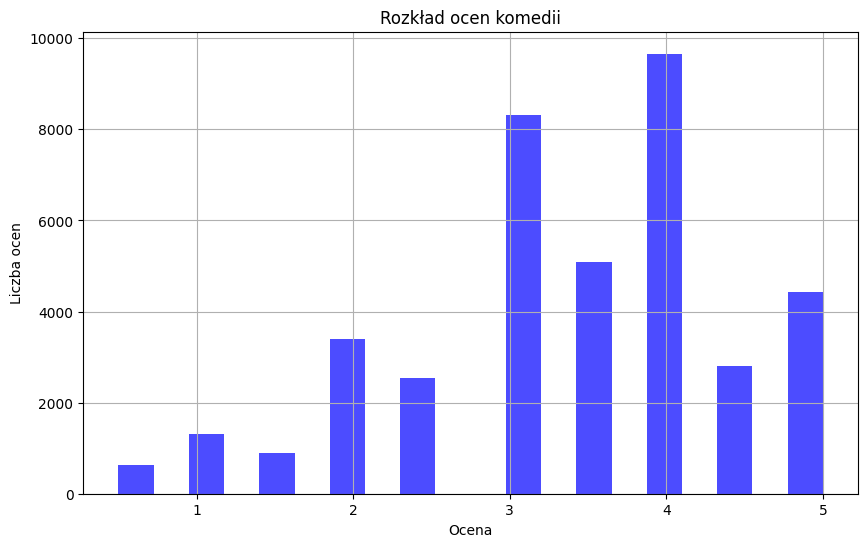

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(comedy_ratings, bins=20, color='blue', alpha=0.7)
plt.title('Rozkład ocen komedii')
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')
plt.grid(True)
plt.show()

In [20]:
action_ratings = merged_df[merged_df['genres'].str.contains('Action')]
average_action_rating = action_ratings['rating'].mean()
print(f"Średnia ocena filmów akcji: {average_action_rating:.2f}")

Średnia ocena filmów akcji: 3.45


In [21]:
min_number_of_ratings = 100
top_action_movies = action_ratings.groupby('title').agg({'rating': ['mean', 'count']})
top_action_movies = top_action_movies[top_action_movies[('rating', 'count')] >= min_number_of_ratings]
top_action_movies = top_action_movies.sort_values(by=[('rating', 'mean'), ('rating', 'count')], ascending=[False, False]).head(3)
print("Trzy najlepiej oceniane filmy akcji:")
print(top_action_movies)

Trzy najlepiej oceniane filmy akcji:
                              rating      
                                mean count
title                                     
Fight Club (1999)           4.272936   218
Dark Knight, The (2008)     4.238255   149
Princess Bride, The (1987)  4.232394   142


In [22]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162985 sha256=fb70e08139f0f9ae8017eca288636909904f54c343b641c0a871f1082c11bc74
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [23]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, KNNWithMeans

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

svd = SVD()
knn_with_means = KNNWithMeans()

svd_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
knn_results = cross_validate(knn_with_means, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8724  0.8762  0.8647  0.8776  0.8781  0.8738  0.0050  
MAE (testset)     0.6695  0.6744  0.6664  0.6736  0.6736  0.6715  0.0031  
Fit time          1.58    1.87    2.28    1.90    1.67    1.86    0.24    
Test time         0.31    0.13    0.28    0.29    0.14    0.23    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8977  0.8996  0.8916  0.8972  0.8970  0.8966  0.

# **Różnice między KNNWithMeans a standardowym KNN**
Algorytm KNNWithMeans różni się od standardowego KNN tym, że bierze pod uwagę średnią ocenę każdego użytkownika podczas obliczania podobieństw. Dzięki temu jest w stanie lepiej radzić sobie z osobistymi tendencjami oceniania, co może prowadzić do bardziej trafnych rekomendacji, szczególnie gdy użytkownicy mają różne skale oceniania.

In [24]:
from surprise.model_selection import GridSearchCV

param_grid = {'k': [2, 3, 4, 5, 6]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['RMSE', 'MAE'], cv=3)
gs.fit(data)

print(gs.best_params)
print(gs.best_score)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [25]:
from surprise import KNNWithMeans, Dataset, Reader
from surprise.model_selection import train_test_split

data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
model = KNNWithMeans()
model.fit(trainset)

def get_similar_movies(movie_title, k=10):
    movie_id = movies_df[movies_df['title'].str.contains(movie_title)].iloc[0]['movieId']
    neighbors = model.get_neighbors(movie_id, k=k)
    neighbor_movies = movies_df[movies_df['movieId'].isin(neighbors)]
    return neighbor_movies

similar_to_jumanji = get_similar_movies('Jumanji')
similar_to_flint = get_similar_movies('Flint')

print("Filmy podobne do 'Jumanji':\n", similar_to_jumanji)
print("Filmy podobne do 'Flint':\n", similar_to_flint)


Computing the msd similarity matrix...
Done computing similarity matrix.
Filmy podobne do 'Jumanji':
      movieId                                   title                genres
49        54                   Big Green, The (1995)       Children|Comedy
66        74                     Bed of Roses (1996)         Drama|Romance
114      137                  Man of the Year (1995)           Documentary
177      209               White Man's Burden (1995)                 Drama
262      302  Queen Margot (Reine Margot, La) (1994)         Drama|Romance
301      343           Baby-Sitters Club, The (1995)              Children
383      440                             Dave (1993)        Comedy|Romance
384      441               Dazed and Confused (1993)                Comedy
397      456                            Fresh (1994)  Crime|Drama|Thriller
Filmy podobne do 'Flint':
      movieId                                              title  \
44        48                                  Pocahont